# Logistic Regression Implementation From Scratch

## Importing Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Importing the Dataset

In [2]:
from sklearn import datasets
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

## Splitting the Dataset into the Training, Cross Validation and Test sets

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_, y_train, y_ = train_test_split(X, y, test_size = 0.40, random_state = 42)
X_CV, X_test, y_CV, y_test = train_test_split(X_, y_, test_size = 0.50, random_state = 42)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_CV = sc.transform(X_CV)
X_test = sc.transform(X_test)

## Defining the Custom Logistic Regression Class

In [5]:
class CustomLogisticRegression():

    def __init__(self, max_iter = 1000, learning_rate = 0.01):
        
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.theta = None
        self.bias = None
        
    def fit(self, X, y):
        
        n_samples, n_features = X.shape
        self.theta = np.zeros((n_features, 1))
        self.bias = 0
        
        for i in range(0, self.max_iter):
            weighted_sum = np.dot(self.theta.T, X.T) + self.bias
            h_theta = self._sigmoid(weighted_sum)
            self.gradient_descent(y, h_theta, X, n_samples)
                
    def predict(self, inputs):
        
        return [1 if _ >= 0.5 else 0 for _ in self._sigmoid(np.dot(inputs, self.theta) + self.bias)]
        
    def _sigmoid(self, x):
        
        return 1.0 / (1.0 + np.exp(-x))
    
    def gradient_descent(self, y, h_theta, X, n_samples):
        
        self.theta = self.theta - self.learning_rate * (-1 / n_samples) * np.dot((y - h_theta), X).T
        self.bias = self.bias - self.learning_rate * (-1 / n_samples) * np.sum(y - h_theta)
        

## Creating Instance and Fitting the model

In [6]:
clf = CustomLogisticRegression()
clf.fit(X_train, y_train)

## Making Predictions

In [7]:
y_train_pred = clf.predict(X_train)
y_CV_pred = clf.predict(X_CV)
y_test_pred = clf.predict(X_test)

## Evaluate the model and displaying the confusion matrix

Training set accuracy         % 97.94721407624634
Cross validation set accuracy % 98.24561403508771
Test set accuracy             % 99.12280701754386


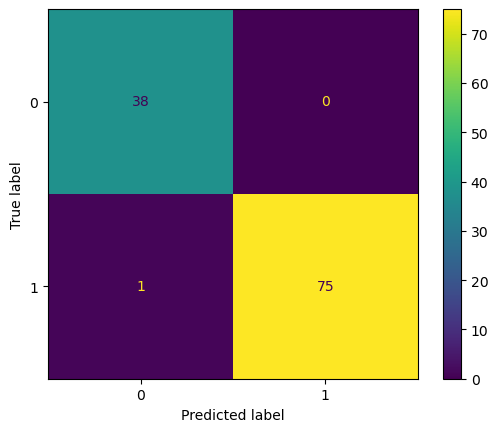

In [8]:
from sklearn import metrics
print("Training set accuracy         %", metrics.accuracy_score(y_train, y_train_pred) * 100)
print("Cross validation set accuracy %", metrics.accuracy_score(y_CV, y_CV_pred) * 100)
print("Test set accuracy             %", metrics.accuracy_score(y_test, y_test_pred) * 100)

cm = metrics.confusion_matrix(y_test, y_test_pred)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()

plt.show()